# Emotion Detection Algorithm

In [1]:
# IMPORT NECESSARY LIBRARIES
import librosa
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
from IPython.display import Audio
import numpy as np
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
from sklearn.metrics import confusion_matrix
import IPython.display as ipd  # To play sound in the notebook
import os # interface with underlying OS that python is running on
import sys
import warnings
# ignore warnings 
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from tensorflow.keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization, Dense
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from s import SGD
from tensorflow.keras.regularizers import l2
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report
import IPython.display as ipd
basedir='/home/ia/code/pankaj-lewagon/ser/raw_data/ravdess_data/'

2021-09-07 17:35:08.067208: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-09-07 17:35:08.067425: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
# PLAY AUDIO FILE
ipd.Audio(basedir+'Actor_01/03-01-01-01-01-01-01.wav')

## PLOTS

In [2]:
#DataFlair - Emotions in the RAVDESS dataset
emotions = {
    '01': 'neutral',
    '02': 'calm',
    '03': 'happy',
    '04': 'sad',
    '05': 'angry',
    '06': 'fearful',
    '07': 'disgust',
    '08': 'surprised'
}

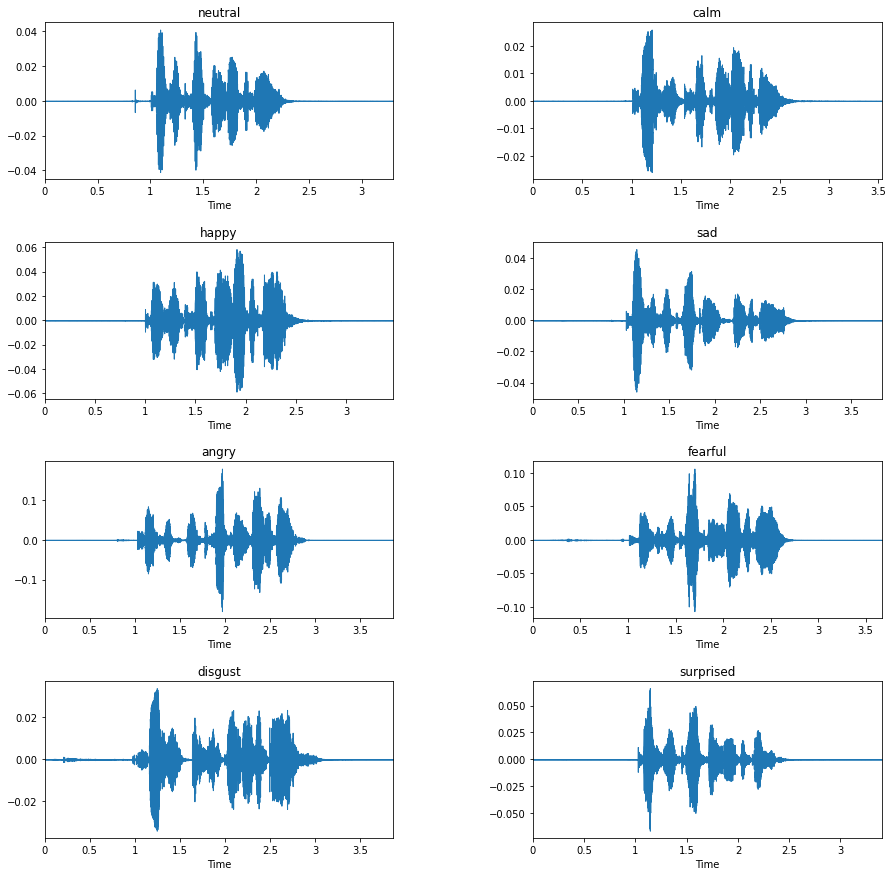

In [6]:
#audio, speech, {emotions}, normal intensity, kids statement, 1st repetition, 1st actor - profile

fig = plt.figure(figsize=(15,15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in emotions.keys():
  filename =f'{basedir}Actor_01/03-01-{i}-01-01-01-01.wav'
  fig.add_subplot(4, 2, int(i))
  plt.title(emotions[i])
  data,sample_rate = librosa.load(filename)
  librosa.display.waveplot(data, sr=sample_rate)


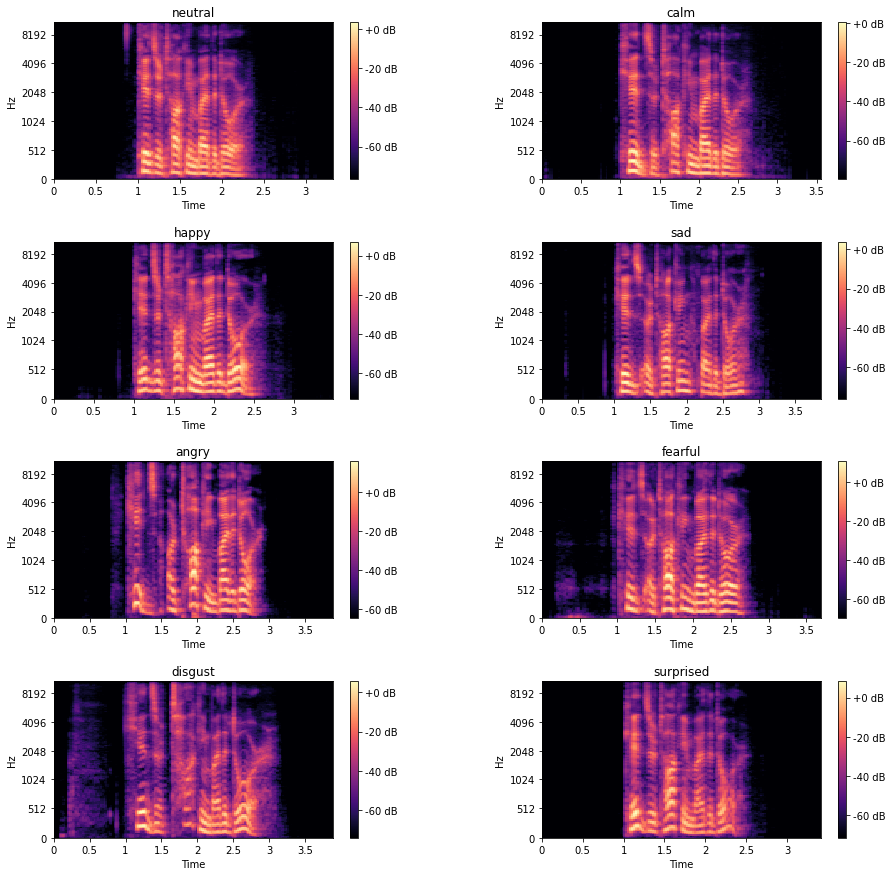

In [7]:
# MEL-SPECTRO
fig = plt.figure(figsize=(15,15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in emotions.keys():
  filename =f'{basedir}Actor_01/03-01-{i}-01-01-01-01.wav'
  fig.add_subplot(4, 2, int(i))
  plt.title(emotions[i])
  data,sample_rate = librosa.load(filename)
  mel = librosa.feature.melspectrogram(y=data, sr=sample_rate, n_mels=128, fmax=8000)
  mel = librosa.power_to_db(mel)
  librosa.display.specshow(mel, sr=sample_rate, x_axis='time', y_axis='mel')
  plt.colorbar(format='%+2.0f dB')


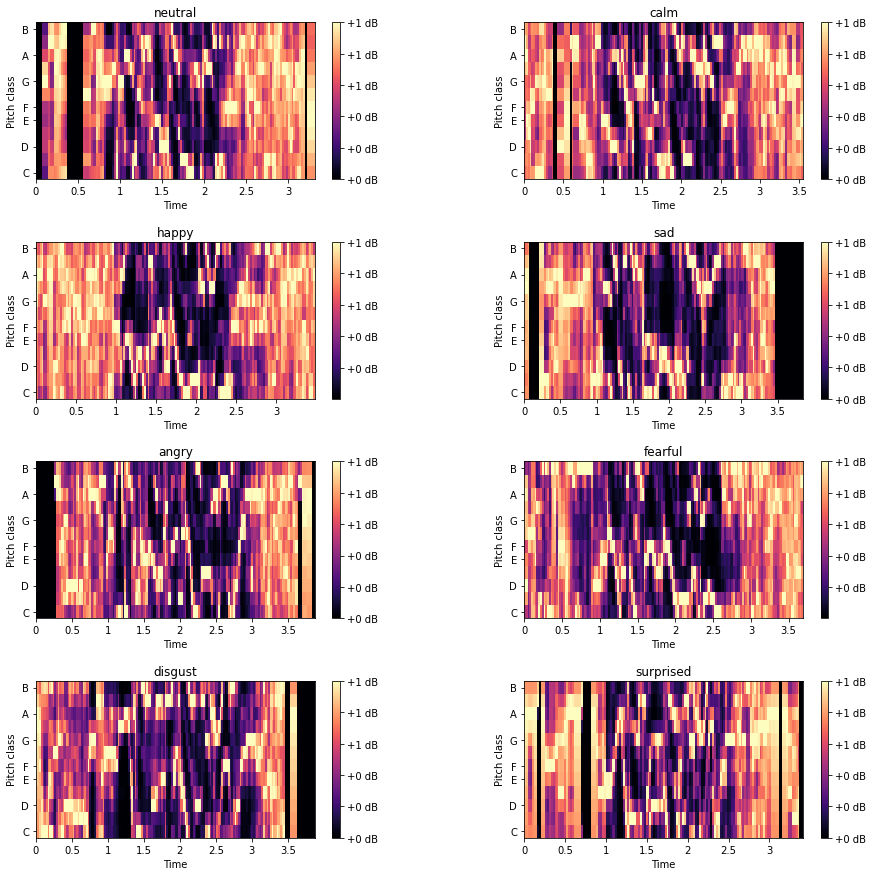

In [8]:
# CHROMA
fig = plt.figure(figsize=(15,15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in emotions.keys():
    filename =f'{basedir}Actor_01/03-01-{i}-01-01-01-01.wav'
    fig.add_subplot(4, 2, int(i))
    plt.title(emotions[i])
    data,sample_rate = librosa.load(filename)
    chroma = librosa.feature.chroma_stft(y=data, sr=sample_rate)
    librosa.display.specshow(chroma, sr=sample_rate, x_axis='time', y_axis='chroma')
    plt.colorbar(format='%+2.0f dB')

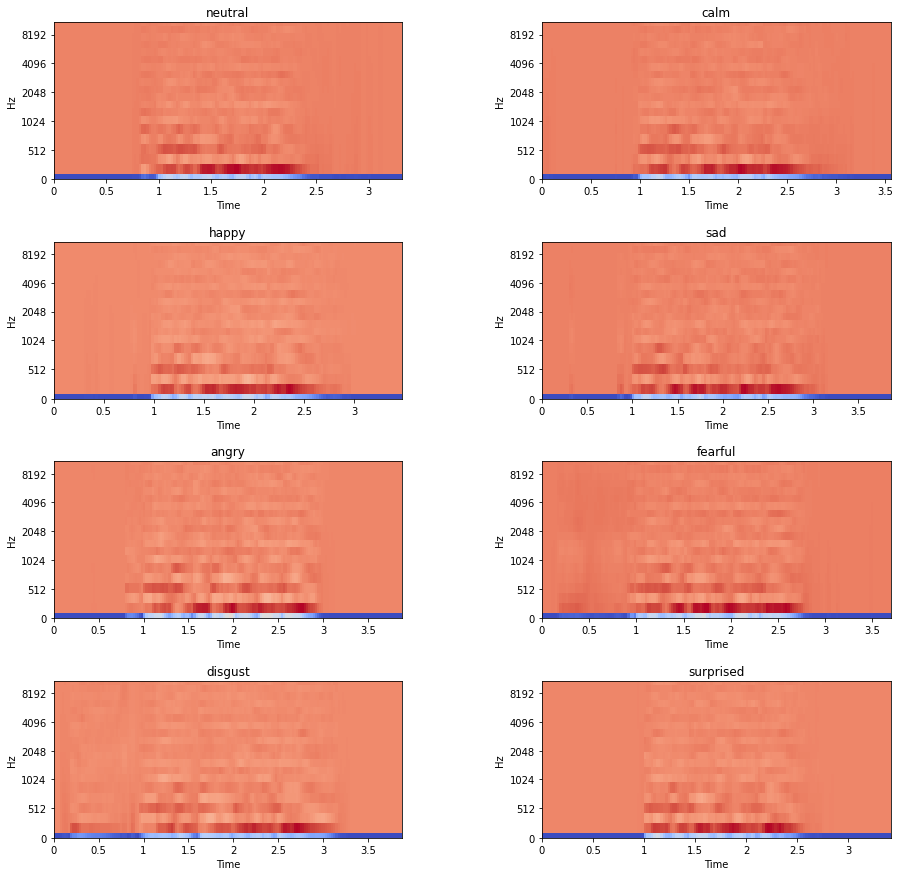

In [9]:
#MFCC
fig = plt.figure(figsize=(15,15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in emotions.keys():
    filename =f'{basedir}Actor_01/03-01-{i}-01-01-01-01.wav'
    fig.add_subplot(4, 2, int(i))
    plt.title(emotions[i])
    data,sample_rate = librosa.load(filename)
    mfcc = librosa.feature.mfcc(y=data, sr=sample_rate)
    librosa.display.specshow(mfcc, sr=sample_rate, x_axis='time', y_axis='mel')

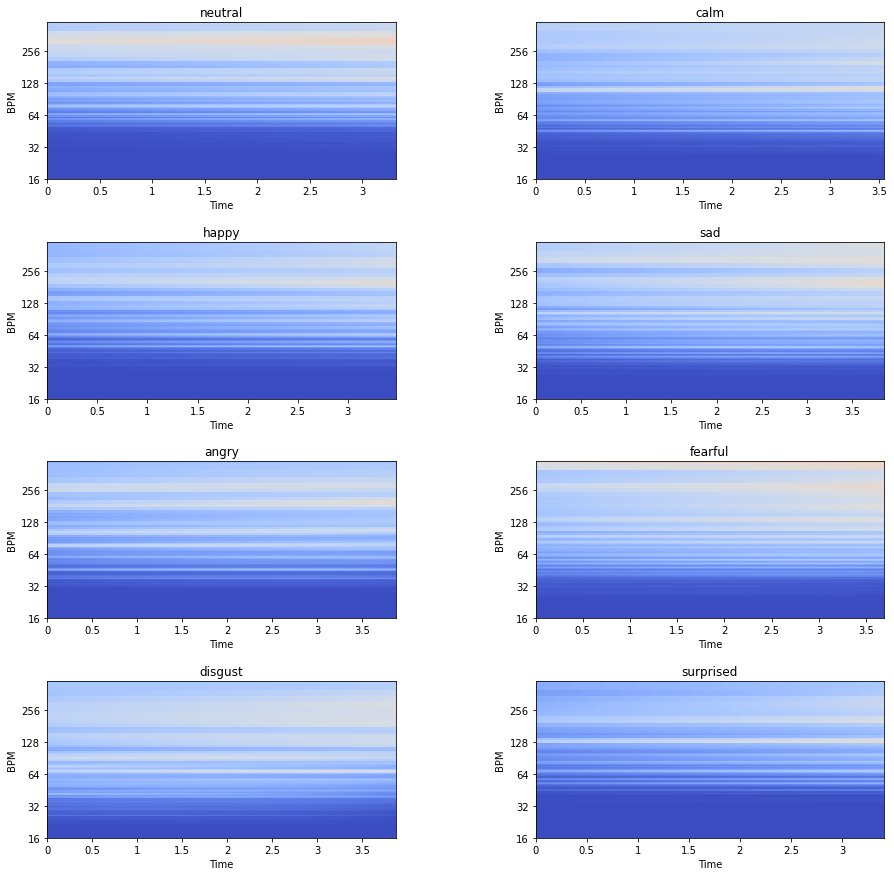

In [10]:
#TEMPOGRAM
fig = plt.figure(figsize=(15,15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in emotions.keys():
    filename =f'{basedir}Actor_01/03-01-{i}-01-01-01-01.wav'
    fig.add_subplot(4, 2, int(i))
    plt.title(emotions[i])
    data,sample_rate = librosa.load(filename)
    temp = librosa.feature.tempogram(y=data, sr=sample_rate)
    librosa.display.specshow(temp, sr=sample_rate, x_axis='time', y_axis='tempo')

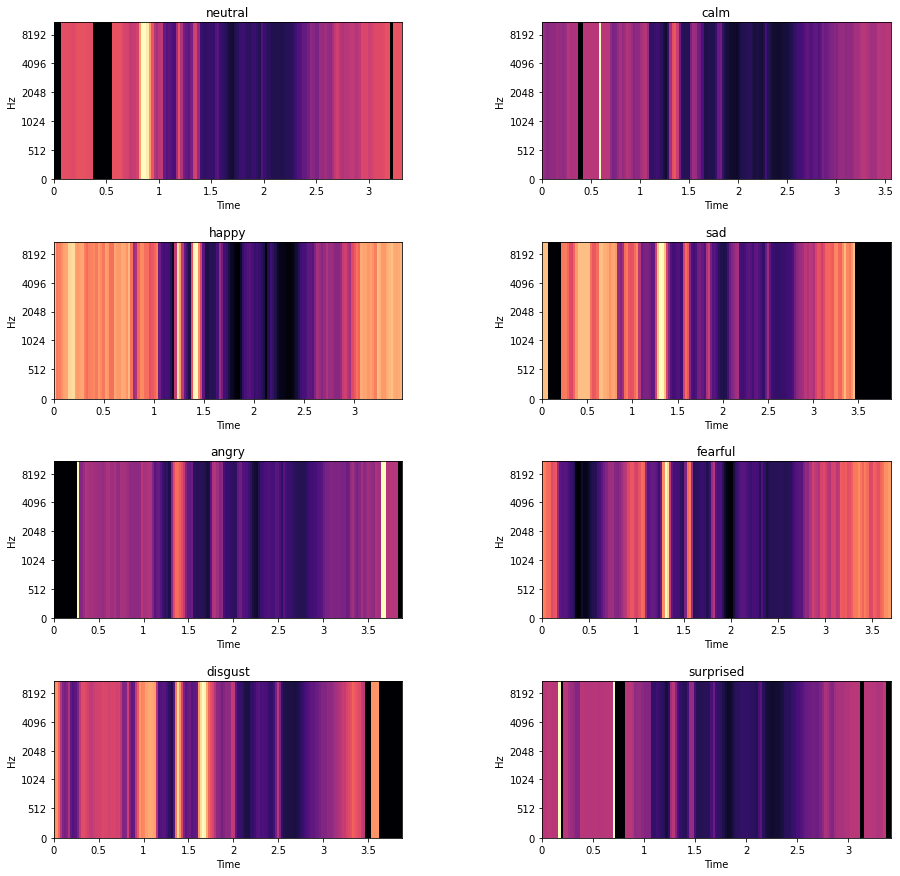

In [12]:
#SPECTRAL-CENTROID
fig = plt.figure(figsize=(15,15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in emotions.keys():
    filename =f'{basedir}Actor_01/03-01-{i}-01-01-01-01.wav'
    fig.add_subplot(4, 2, int(i))
    plt.title(emotions[i])
    data,sample_rate = librosa.load(filename)
    spec = librosa.feature.spectral_centroid(y=data, sr=sample_rate)
    librosa.display.specshow(spec, sr=sample_rate, x_axis='time', y_axis='mel')

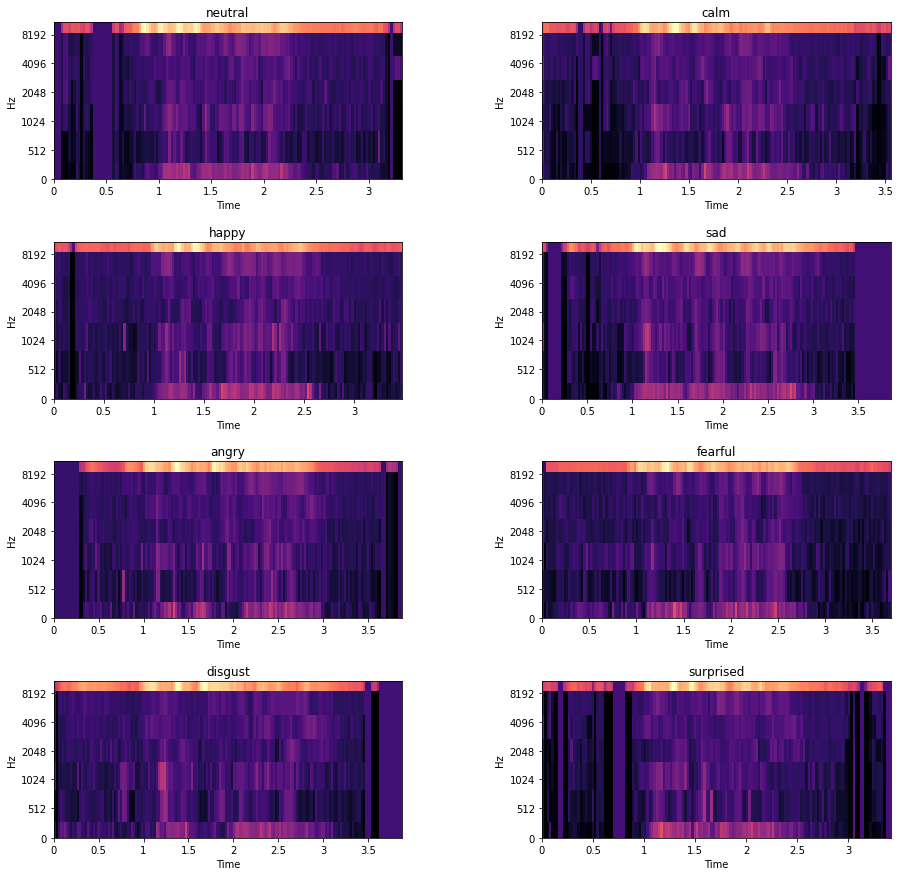

In [13]:
#SPECTRAL-CONTRAST
fig = plt.figure(figsize=(15,15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in emotions.keys():
    filename =f'{basedir}Actor_01/03-01-{i}-01-01-01-01.wav'
    fig.add_subplot(4, 2, int(i))
    plt.title(emotions[i])
    data,sample_rate = librosa.load(filename)
    sc = librosa.feature.spectral_contrast(y=data, sr=sample_rate)
    librosa.display.specshow(sc, sr=sample_rate, x_axis='time', y_axis='mel')

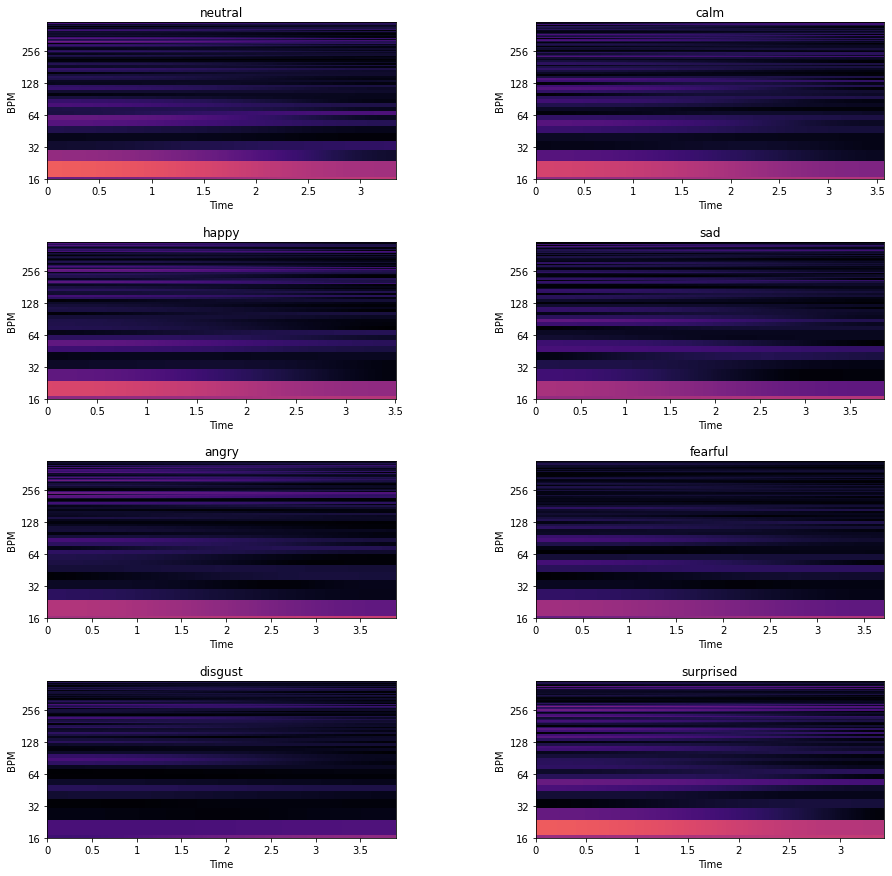

In [15]:
#FOURTIER-TEMPOGRAM
fig = plt.figure(figsize=(15,15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in emotions.keys():
    filename =f'{basedir}Actor_01/03-01-{i}-01-01-01-01.wav'
    fig.add_subplot(4, 2, int(i))
    plt.title(emotions[i])
    data,sample_rate = librosa.load(filename)
    ft = librosa.feature.fourier_tempogram(y=data, sr=sample_rate)
    librosa.display.specshow(ft, sr=sample_rate, x_axis='time', y_axis='fourier_tempo')

# Data Preprocessing

## Labeling Audio Files

In [3]:
# CREATE DIRECTORY OF AUDIO FILES 
basedir='/home/ia/code/pankaj-lewagon/ser/raw_data/ravdess_data/'
audio=basedir
actor_folders = os.listdir(audio) #list files in audio directory
actor_folders.sort() 
actor_folders[0:25];

In [4]:
# CREATE FUNCTION TO EXTRACT lABELS
emotion = []
gender = []
actor = []
file_path = []
for i in actor_folders:
    filename = os.listdir(audio + i) #iterate over Actor folders
    for f in filename: # go through files in Actor folder
        part = f.split('.')[0].split('-')
        emotion.append(int(part[2]))
        actor.append(int(part[6]))
        bg = int(part[6])
        if bg%2 == 0:
            bg = "female"
        else:
            bg = "male"
        gender.append(bg)
        file_path.append(audio + i + '/' + f)

In [5]:
# PUT EXTRACTED LABELS WITH FILEPATH INTO DATAFRAME
audio_df = pd.DataFrame(emotion)
audio_df = audio_df.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'})
audio_df = pd.concat([pd.DataFrame(gender),audio_df,pd.DataFrame(actor)],axis=1)
audio_df.columns = ['gender','emotion','actor']
audio_df = pd.concat([audio_df,pd.DataFrame(file_path, columns = ['path'])],axis=1)
audio_df

,gender,emotion,actor,path
0,male,neutral,1,/home/ia/code/pankaj-lewagon/ser/raw_data/ravd...
1,male,fear,1,/home/ia/code/pankaj-lewagon/ser/raw_data/ravd...
2,male,surprise,1,/home/ia/code/pankaj-lewagon/ser/raw_data/ravd...
3,male,angry,1,/home/ia/code/pankaj-lewagon/ser/raw_data/ravd...
4,male,fear,1,/home/ia/code/pankaj-lewagon/ser/raw_data/ravd...
...,...,...,...,...
1435,female,surprise,24,/home/ia/code/pankaj-lewagon/ser/raw_data/ravd...
1436,female,angry,24,/home/ia/code/pankaj-lewagon/ser/raw_data/ravd...
1437,female,surprise,24,/home/ia/code/pankaj-lewagon/ser/raw_data/ravd...
1438,female,neutral,24,/home/ia/code/pankaj-lewagon/ser/raw_data/ravd...


In [6]:
query_df = audio_df.query('actor==1') #each actor has 59 file
query_df.shape

(60, 4)

In [7]:
query_df.head()

,gender,emotion,actor,path
0,male,neutral,1,/home/ia/code/pankaj-lewagon/ser/raw_data/ravd...
1,male,fear,1,/home/ia/code/pankaj-lewagon/ser/raw_data/ravd...
2,male,surprise,1,/home/ia/code/pankaj-lewagon/ser/raw_data/ravd...
3,male,angry,1,/home/ia/code/pankaj-lewagon/ser/raw_data/ravd...
4,male,fear,1,/home/ia/code/pankaj-lewagon/ser/raw_data/ravd...


In [8]:
# ENSURE GENDER,EMOTION, AND ACTOR COLUMN VALUES ARE CORRECT
pd.set_option('display.max_colwidth', -1)
audio_df.sample(10)

,gender,emotion,actor,path
39,male,sad,1,/home/ia/code/pankaj-lewagon/ser/raw_data/ravdess_data/Actor_01/03-01-04-02-01-02-01.wav
872,male,fear,15,/home/ia/code/pankaj-lewagon/ser/raw_data/ravdess_data/Actor_15/03-01-06-02-01-01-15.wav
1379,male,fear,23,/home/ia/code/pankaj-lewagon/ser/raw_data/ravdess_data/Actor_23/03-01-06-01-01-02-23.wav
1356,male,surprise,23,/home/ia/code/pankaj-lewagon/ser/raw_data/ravdess_data/Actor_23/03-01-08-02-01-02-23.wav
666,female,happy,12,/home/ia/code/pankaj-lewagon/ser/raw_data/ravdess_data/Actor_12/03-01-03-01-02-02-12.wav
582,female,fear,10,/home/ia/code/pankaj-lewagon/ser/raw_data/ravdess_data/Actor_10/03-01-06-01-01-02-10.wav
442,female,neutral,8,/home/ia/code/pankaj-lewagon/ser/raw_data/ravdess_data/Actor_08/03-01-01-01-01-02-08.wav
1094,male,calm,19,/home/ia/code/pankaj-lewagon/ser/raw_data/ravdess_data/Actor_19/03-01-02-01-01-01-19.wav
942,female,calm,16,/home/ia/code/pankaj-lewagon/ser/raw_data/ravdess_data/Actor_16/03-01-02-01-02-02-16.wav
1103,male,angry,19,/home/ia/code/pankaj-lewagon/ser/raw_data/ravdess_data/Actor_19/03-01-05-02-01-01-19.wav


<AxesSubplot:>

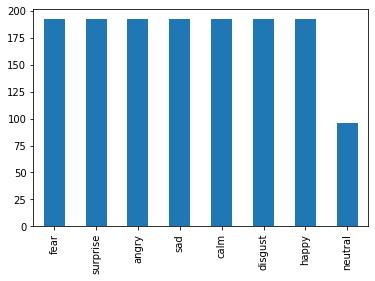

In [20]:
# LOOK AT DISTRIBUTION OF CLASSES
audio_df.emotion.value_counts().plot(kind='bar')

## Feature Extraction

In [10]:
# ITERATE OVER ALL AUDIO FILES AND EXTRACT FEATURES FOR MODELLING

ls_mel = list()
ls_chroma= list()
ls_lm = list()
ls_mfcc = list()
ls_temp = list()

for index,path in enumerate(audio_df.path):
    #X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=3,sr=44100,offset=0.5)
    X, sample_rate = librosa.load(path,res_type='kaiser_fast',offset=0.5, duration=2.40)
    
    #get the mel-scaled spectrogram (transform both the y-axis (frequency) to log scale, 
    # and the “color” axis (amplitude) to Decibels, which is kinda the log scale of amplitudes.)
    mel = librosa.feature.melspectrogram(y=X, sr=sample_rate, n_mels=128,fmax=8000) 
    db_spec = librosa.power_to_db(mel)
    #temporally average spectrogram
    mean_mel = np.mean(db_spec, axis = 0)
        
    #Mel-frequency cepstral coefficients (MFCCs)
    mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
    mfcc = np.mean(mfcc,axis=0)
    
    # compute chroma energy (pertains to 12 different pitch classes)
    chroma = librosa.feature.chroma_stft(y=X, sr=sample_rate)
    mean_chroma = np.mean(chroma, axis = 0)
    
    temp = librosa.feature.tempogram(y=X, sr=sample_rate)
    mean_temp = np.mean(temp, axis=0)
    
    ft = librosa.feature.fourier_tempogram(y=X, sr=sample_rate)
    mean_ft = np.mean(temp, axis=0)

    # compute spectral contrast
    # contrast = librosa.feature.spectral_contrast(y=X, sr=sample_rate)
    # contrast = np.mean(contrast, axis= 0)

    # compute zero-crossing-rate (zcr:the zcr is the rate of sign changes along a signal i.e.m the rate at 
    # which the signal changes from positive to negative or back - separation of voiced andunvoiced speech.)
    # zcr = librosa.feature.zero_crossing_rate(y=X)
    # zcr = np.mean(zcr, axis= 0)
    
    ls_temp.append(temp)
    ls_mfcc.append(mfcc)
    ls_chroma.append(chroma)
    ls_lm.append(mean_mel)
    ls_mel.append(mel)
  

# Prepping Data for Modeling

In [15]:
np.concatenate(chroma)

array([0.4889241 , 0.7760194 , 1.        , ..., 0.16218677, 0.06327899,
       0.13388355], dtype=float32)

In [22]:
# TURN DATA INTO ARRAYS FOR KERAS
X_cnn = np.array(ls_chroma)
#X_mlp = np.hstack((ls_mfcc, ls_lm, ls_temp))

# ADD EXTRA DIMENSION FOR CNN
X_cnn = np.expand_dims(X_cnn, axis=-1)

print(X_cnn.shape)
#print(X_mlp.shape)

(1440, 12, 104, 1)


In [23]:
y = audio_df['emotion']
y

0       neutral 
1       fear    
2       surprise
3       angry   
4       fear    
        ...     
1435    surprise
1436    angry   
1437    surprise
1438    neutral 
1439    fear    
Name: emotion, Length: 1440, dtype: object

In [23]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

y = to_categorical(LabelEncoder().fit_transform(audio_df.emotion.values), num_classes=8)
y.shape

(1440, 8)

In [19]:
y

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [28]:
print(X_cnn[0].shape)
#print(X_mlp[0].shape)

(12, 104, 1)


In [29]:
# TRAIN TEST SPLIT DATA
Xcnn_train, Xcnn_test, ycnn_train, ycnn_test = train_test_split(X_cnn, y, test_size=0.2, random_state=0)
#Xmlp_train, Xmlp_test, ymlp_train, ymlp_test = train_test_split(X_mlp, y, test_size=0.2, random_state=0)

In [30]:
print(Xcnn_train.shape)
#print(Xmlp_train.shape)

(1152, 12, 104, 1)


In [29]:
print(ycnn_train.shape)
#print(ymlp_train.shape)

(1152, 8)
(1152, 8)


In [31]:
print(Xcnn_test.shape)
print(Xmlp_test.shape)

(288, 12, 104, 1)


NameError: name 'Xmlp_test' is not defined

In [31]:
print(ycnn_test.shape)
print(ymlp_test.shape)

(288, 8)
(288, 8)


# Modelling

## CNN+LSTM

In [50]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, load_model

model = Sequential()
model.add(layers.Conv2D(64, kernel_size=(3), activation='relu', input_shape=X[0].shape))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Conv2D(64, kernel_size=(3),activation='relu',kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(64, kernel_size=(3),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.4))

model.add(layers.Reshape((14, 704)))
model.add(layers.LSTM(units=40, activation='tanh'))
#model.add(layers.LSTM(units=20,  return_sequences = False, activation='relu'))
model.add(layers.Dense(8, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 126, 102, 64)      640       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 63, 51, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 61, 49, 64)        36928     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 30, 24, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 28, 22, 64)        36928     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 14, 11, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 9856)             

## Initial Tensor Model - Pankaj

In [55]:
##### output_shape = ycnn_train.shape[1]
from tensorflow.keras import layers
from tensorflow.keras import callbacks
es = callbacks.EarlyStopping(patience=30, restore_best_weights=True)

#BUILD CNN MODEL
model = Sequential()
model.add(layers.Conv2D(32, kernel_size=(3), activation='relu', input_shape=Xcnn_train[1].shape,padding="same"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2)))
#model.add(layers.Dropout(0.2)) # 1st

model.add(layers.Conv2D(32, kernel_size=(3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2)))
#model.add(layers.Dropout(0.2)) # 2nd
          
model.add(layers.Conv2D(64, kernel_size=(3), activation='relu', padding="same"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
#model.add(layers.Dropout(0.2)) # 3rd 

model.add(layers.Conv2D(128, kernel_size=(3), padding="same"))
model.add(layers.BatchNormalization())
#model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2), padding="same"))
#model.add(layers.Dropout(0.2)) # 4rd 
          
          
model.add(layers.Flatten())
model.add(layers.Dense(256))
model.add(layers.Dropout(0.2))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
#model.add(layers.Flatten())
model.add(layers.Dropout(0.2))

model.add(layers.Dense(output_shape, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam' ,metrics=['accuracy','Precision', 'Recall'])
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_54 (Conv2D)           (None, 12, 104, 32)       320       
_________________________________________________________________
batch_normalization_57 (Batc (None, 12, 104, 32)       128       
_________________________________________________________________
max_pooling2d_51 (MaxPooling (None, 6, 52, 32)         0         
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 4, 50, 32)         9248      
_________________________________________________________________
batch_normalization_58 (Batc (None, 4, 50, 32)         128       
_________________________________________________________________
max_pooling2d_52 (MaxPooling (None, 2, 25, 32)         0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 2, 25, 64)       

In [40]:
model_cnn=model.fit(Xcnn_train, ycnn_train,batch_size=16, epochs=40, validation_split=0.2)

2021-09-08 06:53:52.017254: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/40
58/58 [==============================] - 6s 57ms/step - loss: 2.1188 - accuracy: 0.2465 - precision: 0.3169 - recall: 0.0836 - val_loss: 2.9068 - val_accuracy: 0.1515 - val_precision: 0.1515 - val_recall: 0.1515
Epoch 2/40
58/58 [==============================] - 2s 35ms/step - loss: 1.2910 - accuracy: 0.5440 - precision: 0.6889 - recall: 0.3246 - val_loss: 4.1600 - val_accuracy: 0.1515 - val_precision: 0.1515 - val_recall: 0.1515
Epoch 3/40
58/58 [==============================] - 2s 34ms/step - loss: 0.8858 - accuracy: 0.6971 - precision: 0.8603 - recall: 0.5081 - val_loss: 5.0889 - val_accuracy: 0.1515 - val_precision: 0.1515 - val_recall: 0.1515
Epoch 4/40
58/58 [==============================] - 2s 34ms/step - loss: 0.6085 - accuracy: 0.8187 - precision: 0.8940 - recall: 0.6775 - val_loss: 6.3636 - val_accuracy: 0.1515 - val_precision: 0.1515 - val_recall: 0.1515
Epoch 5/40
58/58 [==============================] - 2s 36ms/step - loss: 0.3796 - accuracy: 0.8914 - precisi

Epoch 38/40
58/58 [==============================] - 2s 37ms/step - loss: 0.0083 - accuracy: 0.9978 - precision: 0.9978 - recall: 0.9978 - val_loss: 2.6636 - val_accuracy: 0.3506 - val_precision: 0.3738 - val_recall: 0.3333
Epoch 39/40
58/58 [==============================] - 2s 38ms/step - loss: 0.0169 - accuracy: 0.9946 - precision: 0.9967 - recall: 0.9946 - val_loss: 2.6916 - val_accuracy: 0.3506 - val_precision: 0.3610 - val_recall: 0.3203
Epoch 40/40
58/58 [==============================] - 3s 50ms/step - loss: 0.0207 - accuracy: 0.9967 - precision: 0.9967 - recall: 0.9935 - val_loss: 2.6958 - val_accuracy: 0.3939 - val_precision: 0.4050 - val_recall: 0.3506


## MLP_ Model

In [38]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(alpha=0.01,
                              batch_size=32,
                              epsilon=1e-08,
                              hidden_layer_sizes=(300, ),
                              activation = 'logistic',
                              learning_rate='adaptive',
                              max_iter=500)

In [59]:
# Create MLP model
model2 = Sequential()
model2.add(Dense(300, input_shape=Xmlp_train[0].shape, activation='relu'))
model2.add(Dense(50, activation='relu'))
model2.add(Dense(8, activation='softmax'))
model2.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy','Precision', 'Recall'])
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 300)               93900     
_________________________________________________________________
dense_12 (Dense)             (None, 50)                15050     
_________________________________________________________________
dense_13 (Dense)             (None, 8)                 408       
Total params: 109,358
Trainable params: 109,358
Non-trainable params: 0
_________________________________________________________________


In [60]:
model_mlp = model2.fit(Xmlp_train, ymlp_train)

36/36 [==============================] - 2s 7ms/step - loss: 9.2384 - accuracy: 0.2040 - precision: 0.2147 - recall: 0.1675


## Merging Models

In [61]:
# Define Inputs and Outputs of models

input_cnn = model.inputs
output_cnn = model.output

input_mlp = model2.input
output_mlp = model2.output

In [62]:
# Let's combine the two streams of data and add two dense layers on top!
from tensorflow.keras import models

inputs = [input_cnn, input_mlp]

combined = layers.concatenate([output_cnn, output_mlp])

x = layers.Dense(32, activation="relu")(combined)

outputs = layers.Dense(8, activation="softmax")(x)

model_combined = models.Model(inputs=inputs, outputs=outputs)

In [63]:
model_combined.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
conv2d_input (InputLayer)       [(None, 128, 104, 1) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 128, 104, 32) 320         conv2d_input[0][0]               
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 128, 104, 32) 128         conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 64, 52, 32)   0           batch_normalization[0][0]        
____________________________________________________________________________________________

In [64]:
model_combined.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy','Precision', 'Recall'])

model_combined.fit(x=[Xcnn_train, Xmlp_train], y=y, validation_split=0.2,
          epochs=50, callbacks=[es],
          batch_size=32)

Epoch 1/50
29/29 [==============================] - 22s 648ms/step - loss: 2.0784 - accuracy: 0.1368 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 2.0762 - val_accuracy: 0.1255 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/50
29/29 [==============================] - 12s 403ms/step - loss: 2.0705 - accuracy: 0.1314 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 2.0691 - val_accuracy: 0.1299 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/50
29/29 [==============================] - 12s 426ms/step - loss: 2.0650 - accuracy: 0.1260 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 2.0663 - val_accuracy: 0.1429 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/50
29/29 [==============================] - 12s 412ms/step - loss: 2.0606 - accuracy: 0.1466 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 2.0626 - val_accuracy: 0.1429 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/50
29/29 [==================

Epoch 35/50
29/29 [==============================] - 18s 602ms/step - loss: 1.9001 - accuracy: 0.2899 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 2.1694 - val_accuracy: 0.1212 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 36/50
29/29 [==============================] - 18s 623ms/step - loss: 1.8955 - accuracy: 0.2671 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 2.1584 - val_accuracy: 0.0952 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00


In [48]:
import tensorflow as tf
import pydot
import graphviz

tf.keras.utils.plot_model(model_combined, "multi_input_model.png", show_shapes=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [51]:
# FIT MODEL AND USE CHECKPOINT TO SAVE BEST MODEL

# FIT MODEL AND USE CHECKPOINT TO SAVE BEST MODEL
checkpoint = ModelCheckpoint("best_initial_model.hdf5", monitor='val_accuracy', verbose=1,
    save_best_only=True, mode='max', period=1, save_weights_only=True)

model_history=model.fit(X_train, y_train,batch_size=8, epochs=40, validation_split=0.2, callbacks=[checkpoint])




Epoch 1/40
116/116 [==============================] - 29s 220ms/step - loss: 2.1058 - accuracy: 0.2638 - val_loss: 1.8044 - val_accuracy: 0.3377

Epoch 00001: val_accuracy improved from -inf to 0.33766, saving model to best_initial_model.hdf5
Epoch 2/40
116/116 [==============================] - 25s 217ms/step - loss: 1.7734 - accuracy: 0.3116 - val_loss: 1.7638 - val_accuracy: 0.3117

Epoch 00002: val_accuracy did not improve from 0.33766
Epoch 3/40
116/116 [==============================] - 23s 198ms/step - loss: 1.7199 - accuracy: 0.3366 - val_loss: 1.7265 - val_accuracy: 0.3593

Epoch 00003: val_accuracy improved from 0.33766 to 0.35931, saving model to best_initial_model.hdf5
Epoch 4/40
116/116 [==============================] - 22s 189ms/step - loss: 1.6935 - accuracy: 0.3550 - val_loss: 1.6912 - val_accuracy: 0.3550

Epoch 00004: val_accuracy did not improve from 0.35931
Epoch 5/40
116/116 [==============================] - 22s 193ms/step - loss: 1.6472 - accuracy: 0.3659 - val_

116/116 [==============================] - 17s 146ms/step - loss: 0.5312 - accuracy: 0.8371 - val_loss: 2.1073 - val_accuracy: 0.4286

Epoch 00040: val_accuracy did not improve from 0.47619


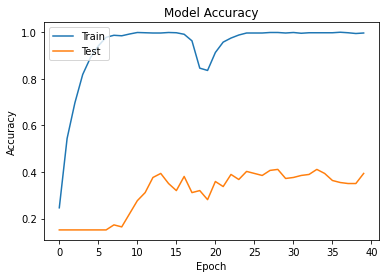

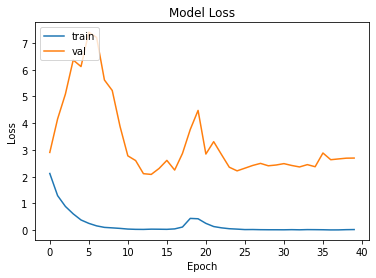

In [50]:

# PLOT MODEL HISTORY OF ACCURACY AND LOSS OVER EPOCHS
plt.plot(model_cnn.history['accuracy'])
plt.plot(model_cnn.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_cnn.history['loss'])
plt.plot(model_cnn.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Post-Model Analysis

In [46]:
# PRINT LOSS AND ACCURACY PERCENTAGE ON TEST SET
print("Loss of the model is - " , model.evaluate(Xcnn_test,ycnn_test)[0])
print("Accuracy of the model is - " , model.evaluate(Xcnn_test,ycnn_test)[1]*100 , "%")

9/9 [==============================] - 1s 18ms/step - loss: 2.9397 - accuracy: 0.3681 - precision: 0.4065 - recall: 0.3472
Loss of the model is -  2.939737558364868
9/9 [==============================] - 0s 19ms/step - loss: 2.9397 - accuracy: 0.3681 - precision: 0.4065 - recall: 0.3472
Accuracy of the model is -  36.80555522441864 %


In [48]:
predictions = model.predict(Xcnn_test)
predictions

array([[1.2498638e-03, 9.0555981e-04, 1.0199423e-03, ..., 4.9493875e-04,
        9.7308314e-01, 1.2417113e-04],
       [2.5471380e-01, 1.3720743e-05, 1.3212864e-01, ..., 3.3909183e-03,
        3.7857682e-01, 2.0179193e-04],
       [5.4068263e-03, 2.4335577e-05, 4.0836886e-02, ..., 6.3653017e-04,
        1.2763630e-01, 8.1852573e-01],
       ...,
       [3.8275242e-01, 2.3799590e-03, 4.7756392e-01, ..., 8.9032028e-04,
        1.4378383e-02, 9.1732672e-04],
       [1.8821847e-04, 6.5428979e-04, 4.3086559e-04, ..., 4.7498304e-02,
        6.9900417e-01, 2.4805242e-05],
       [2.5466026e-05, 1.1026359e-04, 3.6641525e-04, ..., 6.2145153e-04,
        7.1983057e-01, 4.6558134e-02]], dtype=float32)

In [49]:
# PREDICTIONS
predictions = model.predict(X_test)
#predictions=predictions.argmax(axis=1)
#predictions = predictions.astype(int).flatten()
predictions = le.inverse_transform(predictions[:5])
predictions = pd.DataFrame({'Predicted Values': predictions})

# ACTUAL LABELS
actual=y_test.argmax(axis=1)
actual = actual.astype(int).flatten()
actual = (lb.inverse_transform((actual)))
actual = pd.DataFrame({'Actual Values': actual})

# COMBINE BOTH 
finaldf = actual.join(predictions)
finaldf[140:150]

NameError: name 'le' is not defined

In [ ]:
# CREATE CONFUSION MATRIX OF ACTUAL VS. PREDICTION 
cm = confusion_matrix(actual, predictions)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in lb.classes_] , columns = [i for i in lb.classes_])
ax = sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.savefig('Initial_Model_Confusion_Matrix.png')
plt.show()

In [ ]:
print(classification_report(actual, predictions, target_names = ['angry','calm','disgust','fear','happy','neutral','sad','surprise']))

## Hyperparameter Tuning

In [ ]:
# TRAIN TEST SPLIT DATA
train,test = train_test_split(df_combined, test_size=0.2, random_state=0,
                               stratify=df_combined[['gender','actor']])

X_train = train.iloc[:, 3:]
y_train = train.iloc[:,:2].drop(columns=['gender'])
print(X_train.shape)

X_test = test.iloc[:,3:]
y_test = test.iloc[:,:2].drop(columns=['gender'])
print(X_test.shape)

In [ ]:
# NORMALIZE DATA
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)
X_train = (X_train - mean)/std
X_test = (X_test - mean)/std

In [ ]:
# TURN DATA INTO ARRAYS FOR KERAS
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [ ]:
# RESHAPE TO INCLUDE 3D TENSOR
X_train = X_train[:,:,np.newaxis]
X_test = X_test[:,:,np.newaxis]

In [ ]:
# from keras.utils import np_utils, to_categorical

lb = LabelEncoder()

y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

In [ ]:
# CREATE FUNCTION FOR KERAS CLASSIFIER
opt = keras.optimizers.Adam(lr=0.0001)
def make_classifier(optimizer=opt):
    #BUILD CNN MODEL
    model = Sequential()
    model.add(layers.Conv1D(64, kernel_size=(10), activation='relu', input_shape=(X_train.shape[1],1)))
    model.add(layers.Conv1D(128, kernel_size=(10),activation='relu',kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
    model.add(layers.MaxPooling1D(pool_size=(8)))
    model.add(layers.Dropout(0.4))
    model.add(layers.Conv1D(128, kernel_size=(10),activation='relu'))
    model.add(layers.MaxPooling1D(pool_size=(8)))
    model.add(layers.Dropout(0.4))
    model.add(layers.Flatten())
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dropout(0.4))
    model.add(layers.Dense(8, activation='sigmoid'))
    opt = keras.optimizers.Adam(lr=0.0001)
    model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
    return model


In [ ]:
y_trainHot=np.argmax(y_train, axis=1)

In [ ]:
# GRID SEARCH PARAMETERS TO FIND BEST VALUES
classifier = KerasClassifier(build_fn = make_classifier)
params = {
    'batch_size': [30, 32, 34],
    'nb_epoch': [25, 50, 75],
    'optimizer':['adam','SGD']}

grid_search = GridSearchCV(estimator=classifier,
                           param_grid=params,
                           scoring='accuracy',
                           cv=5)

grid_search = grid_search.fit(X_train,y_trainHot)

In [ ]:
grid_search.best_params_

In [ ]:
grid_search.best_score_